# Classic VAR tutorial

In [ ]:
import pandas as pd

# Load the Stock & Watson (2001) dataset
df_sw = pd.read_csv("../datasets/SW2001_Data.csv")
df_sw.set_index('date', inplace=True) # this step is super important
df_sw

,inf,unr,fed
date,,,
1960-03-01,0.908472,5.133333,3.933333
1960-06-01,1.810777,5.233333,3.696667
1960-09-01,1.622720,5.533333,2.936667
1960-12-01,1.795335,6.266667,2.296667
1961-03-01,0.537033,6.800000,2.003333
...,...,...,...
1999-12-01,1.789712,4.100000,5.306667
2000-03-01,3.668536,4.033333,5.680000
2000-06-01,2.102699,4.000000,6.273333


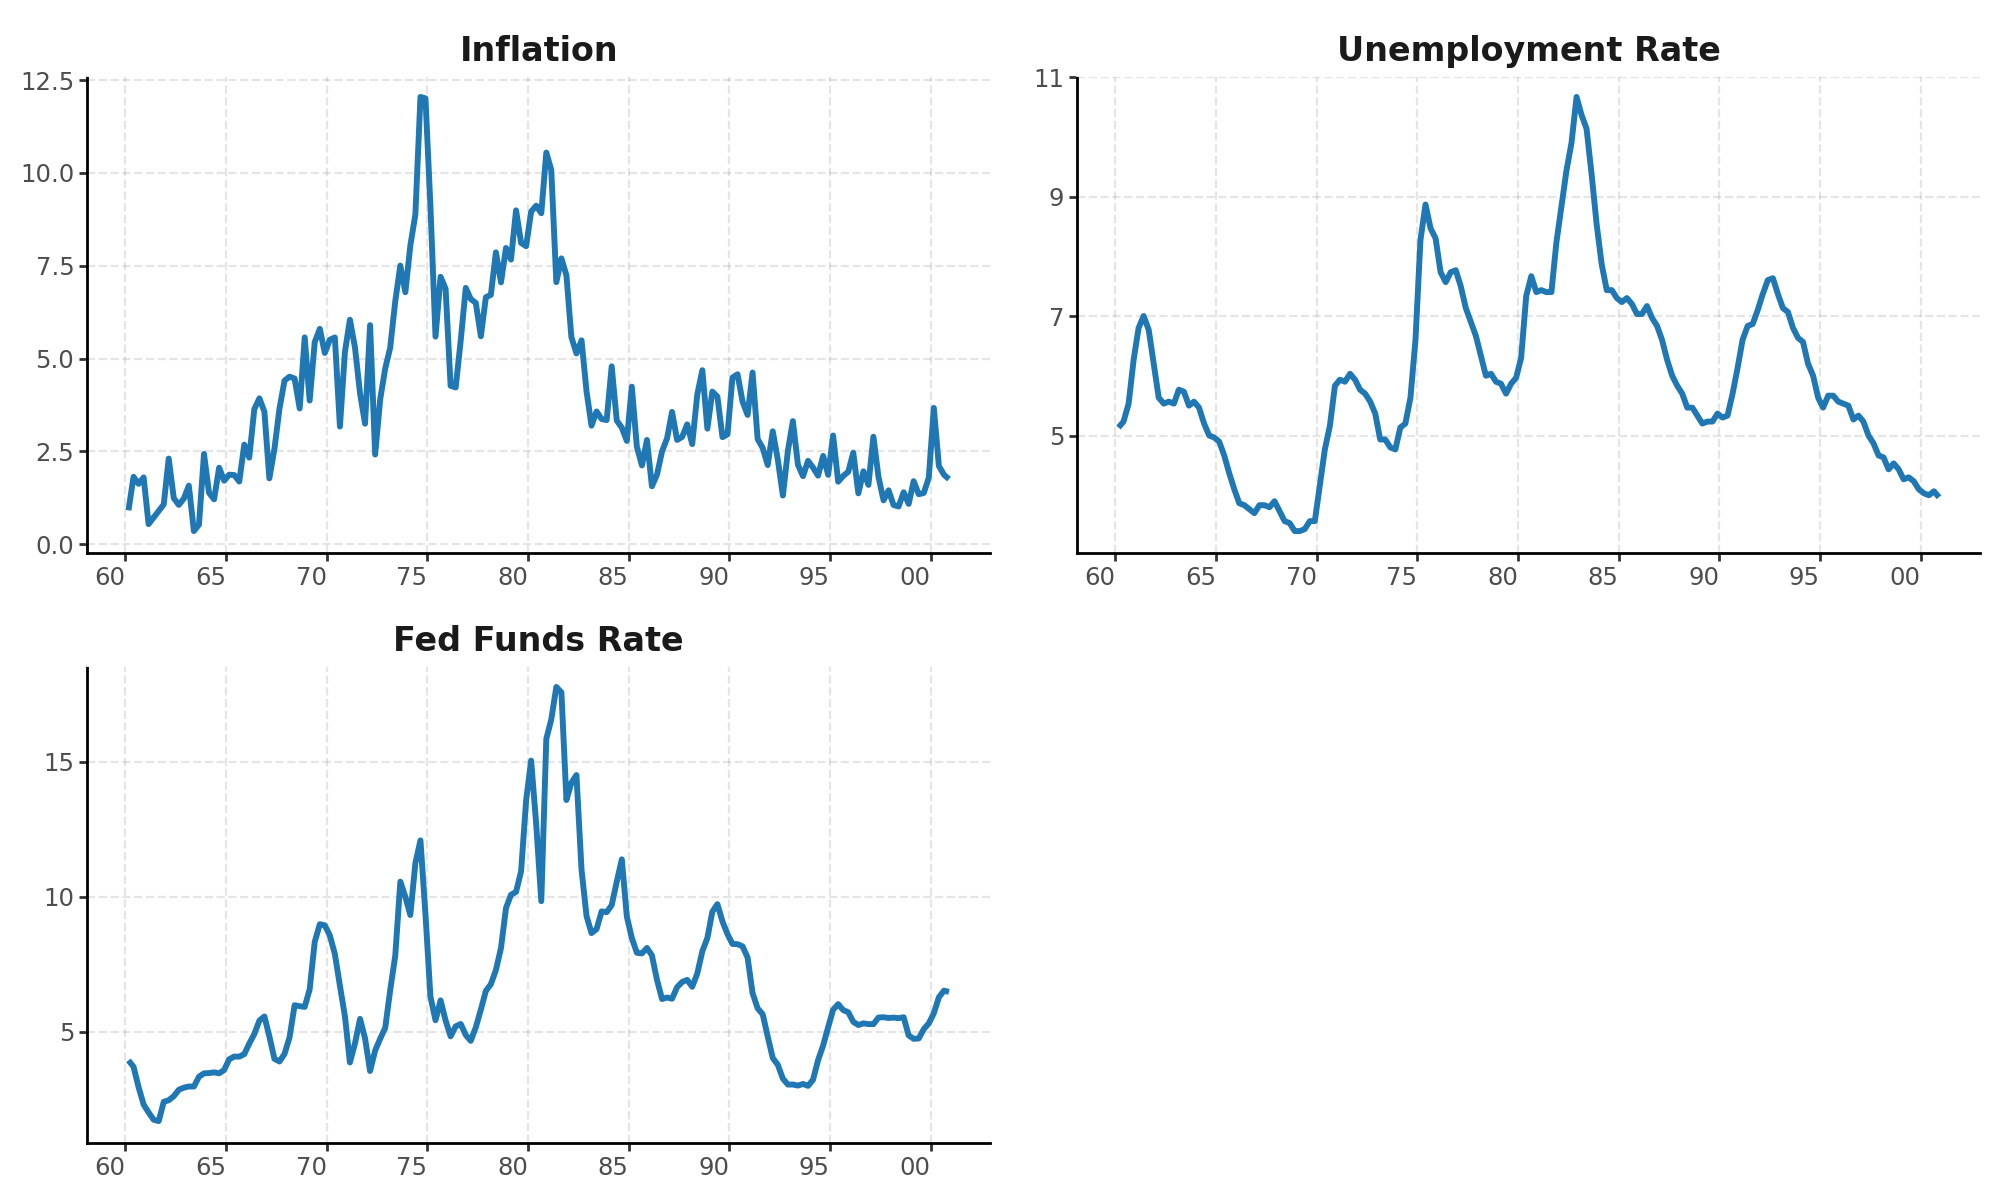

In [2]:
from MacroPy import generate_series_plot

# Generate a series plot for the Stock & Watson (2001) dataset
series_titles = ["Inflation", "Unemployment Rate", "Fed Funds Rate"]
generate_series_plot(df_sw, series_titles=series_titles)

In [3]:
from MacroPy import ClassicVAR

cvar = ClassicVAR(df_sw, lags=4, hor=24, irf_1std=0)
cvar.model_summary()


**MacroPy Toolbox for Macroeconometric Analysis in Python**  
Developed by [Renato Vassallo](https://www.linkedin.com/in/renatovassallo), Institute for Economic Analysis (IAE-CSIC)  
Version 0.1, March 2025  

---

**Model Specifications**  
- **Model Type**: Classic VAR  
- **Endogenous Variables**: inf, unr, fed  
- **Exogenous Variables**: Constant   
- **Number of Lags**: 4  
- **Total Number of Coefficients to Estimate**: 39  

---

**Forecast & IRF Details**  
- **Impulse Response Horizon**: 24  
- **Forecast Horizon**: 12  
- **IRF Computation**: Unit Shock  

---

**VAR Model Equations**

$$
\begin{align*}
inf_{t} &= c_{1} + b_{1,1} inf_{t-1} + b_{1,2} unr_{t-1} + b_{1,3} fed_{t-1} + b_{1,1} inf_{t-2} + b_{1,2} unr_{t-2} + b_{1,3} fed_{t-2} + b_{1,1} inf_{t-3} + b_{1,2} unr_{t-3} + b_{1,3} fed_{t-3} + b_{1,1} inf_{t-4} + b_{1,2} unr_{t-4} + b_{1,3} fed_{t-4} + e_{t}^{inf} \\
unr_{t} &= c_{2} + b_{2,1} inf_{t-1} + b_{2,2} unr_{t-1} + b_{2,3} fed_{t-1} + b_{2,1} inf_{t-2} + b_{2,2} unr_{t-2} + b_{2,3} fed_{t-2} + b_{2,1} inf_{t-3} + b_{2,2} unr_{t-3} + b_{2,3} fed_{t-3} + b_{2,1} inf_{t-4} + b_{2,2} unr_{t-4} + b_{2,3} fed_{t-4} + e_{t}^{unr} \\
fed_{t} &= c_{3} + b_{3,1} inf_{t-1} + b_{3,2} unr_{t-1} + b_{3,3} fed_{t-1} + b_{3,1} inf_{t-2} + b_{3,2} unr_{t-2} + b_{3,3} fed_{t-2} + b_{3,1} inf_{t-3} + b_{3,2} unr_{t-3} + b_{3,3} fed_{t-3} + b_{3,1} inf_{t-4} + b_{3,2} unr_{t-4} + b_{3,3} fed_{t-4} + e_{t}^{fed} \\
\end{align*}
$$


Monte Carlo IRFs: 100%|██████████| 1000/1000 [00:00<00:00, 1562.15it/s]


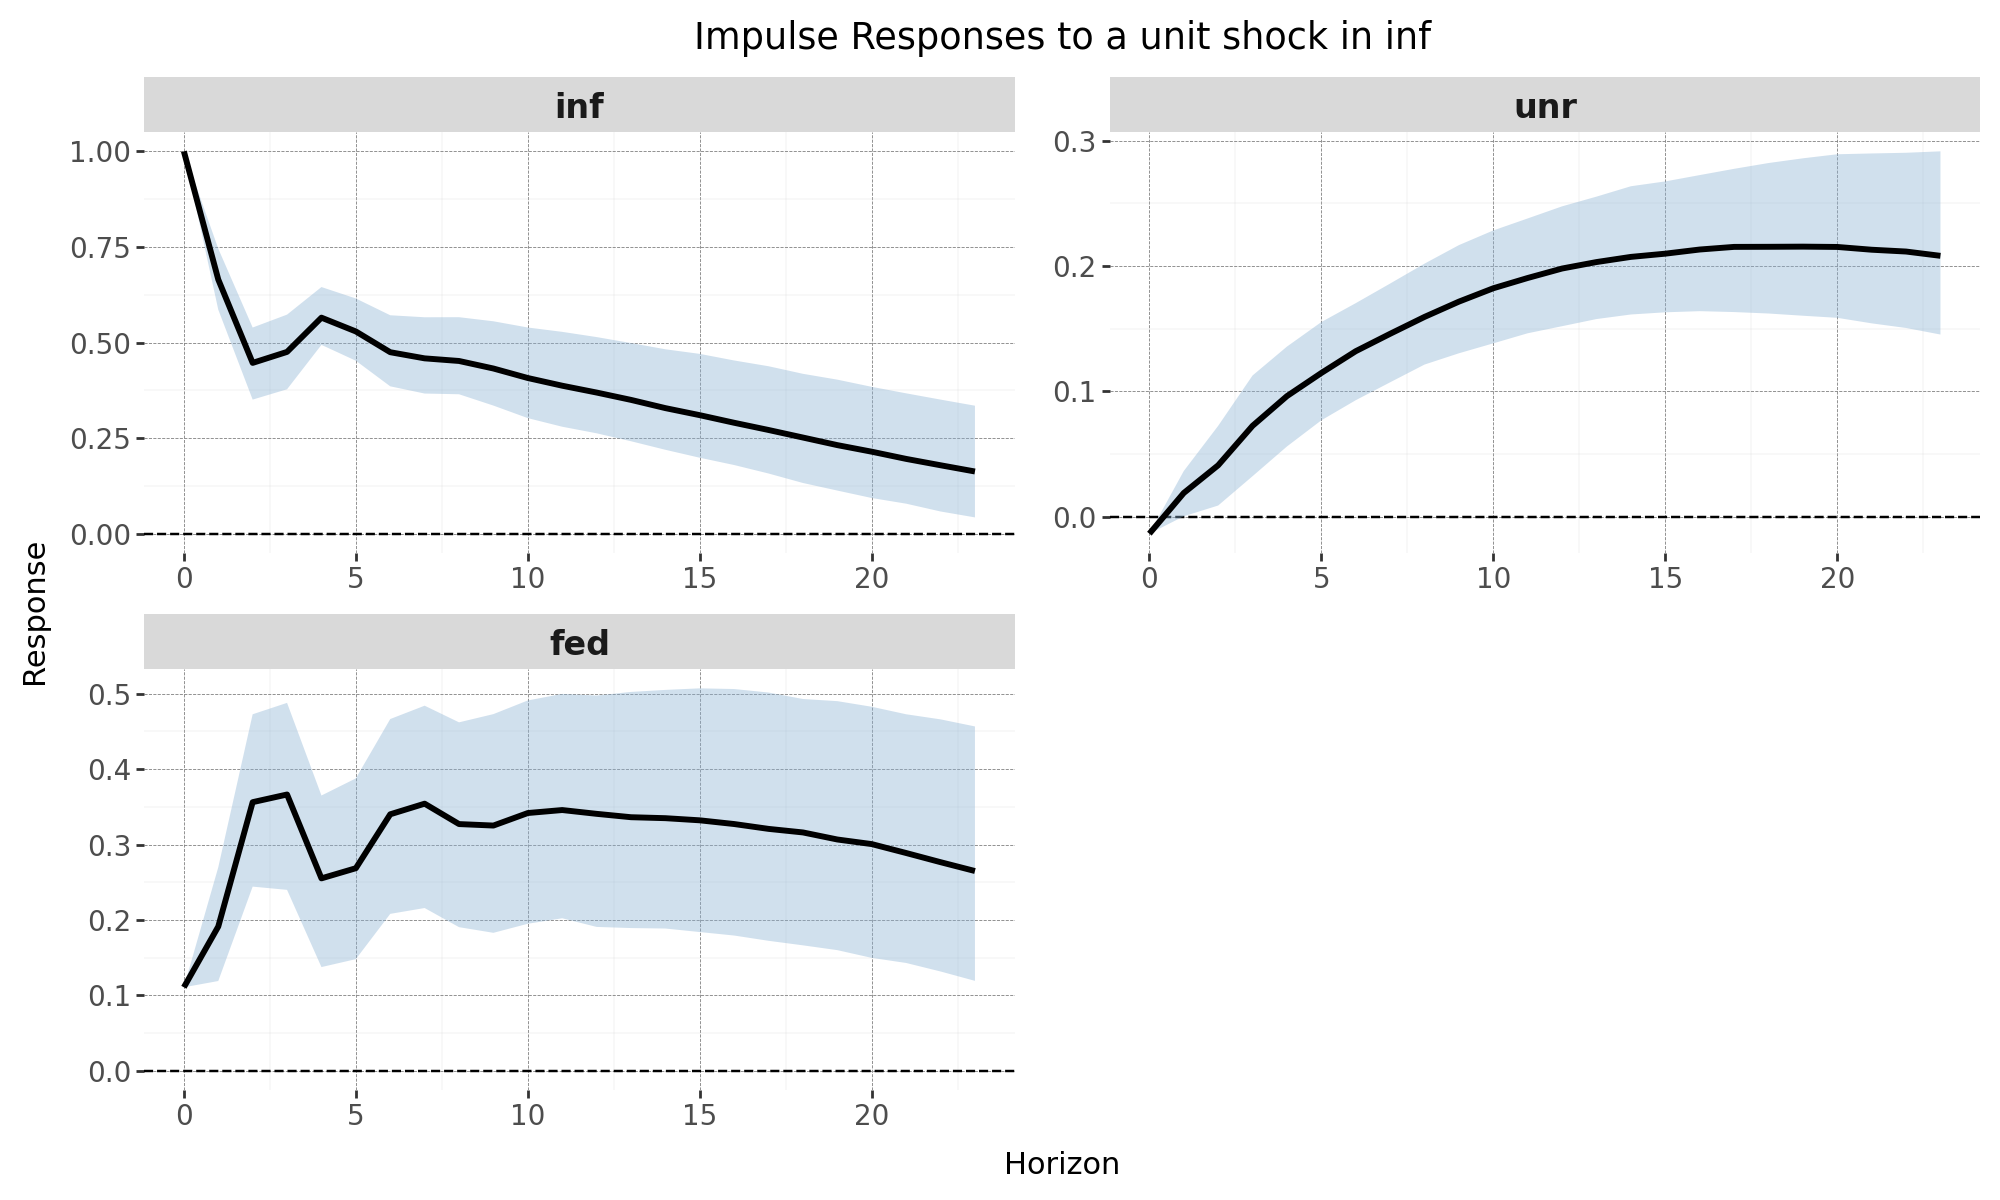

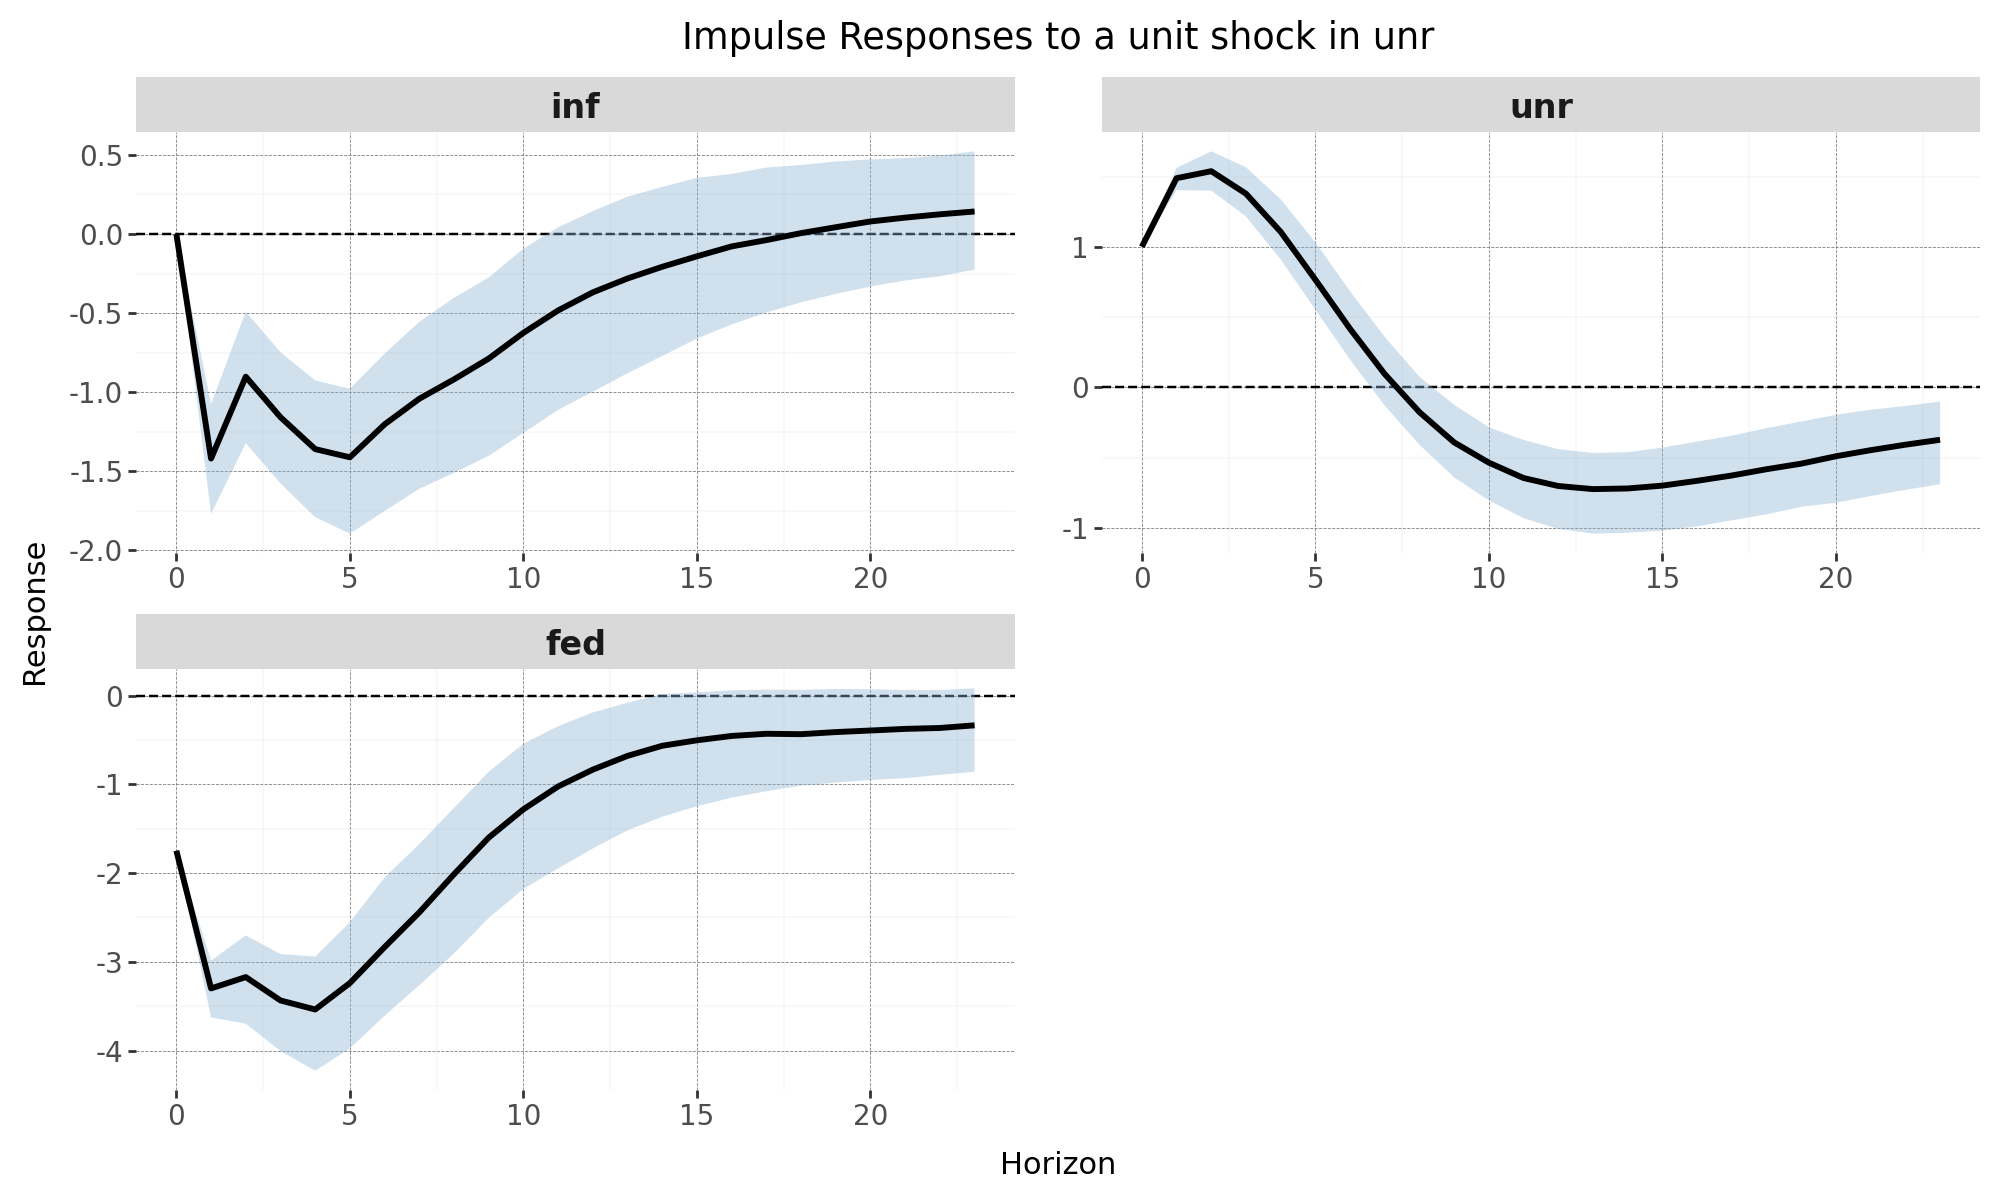

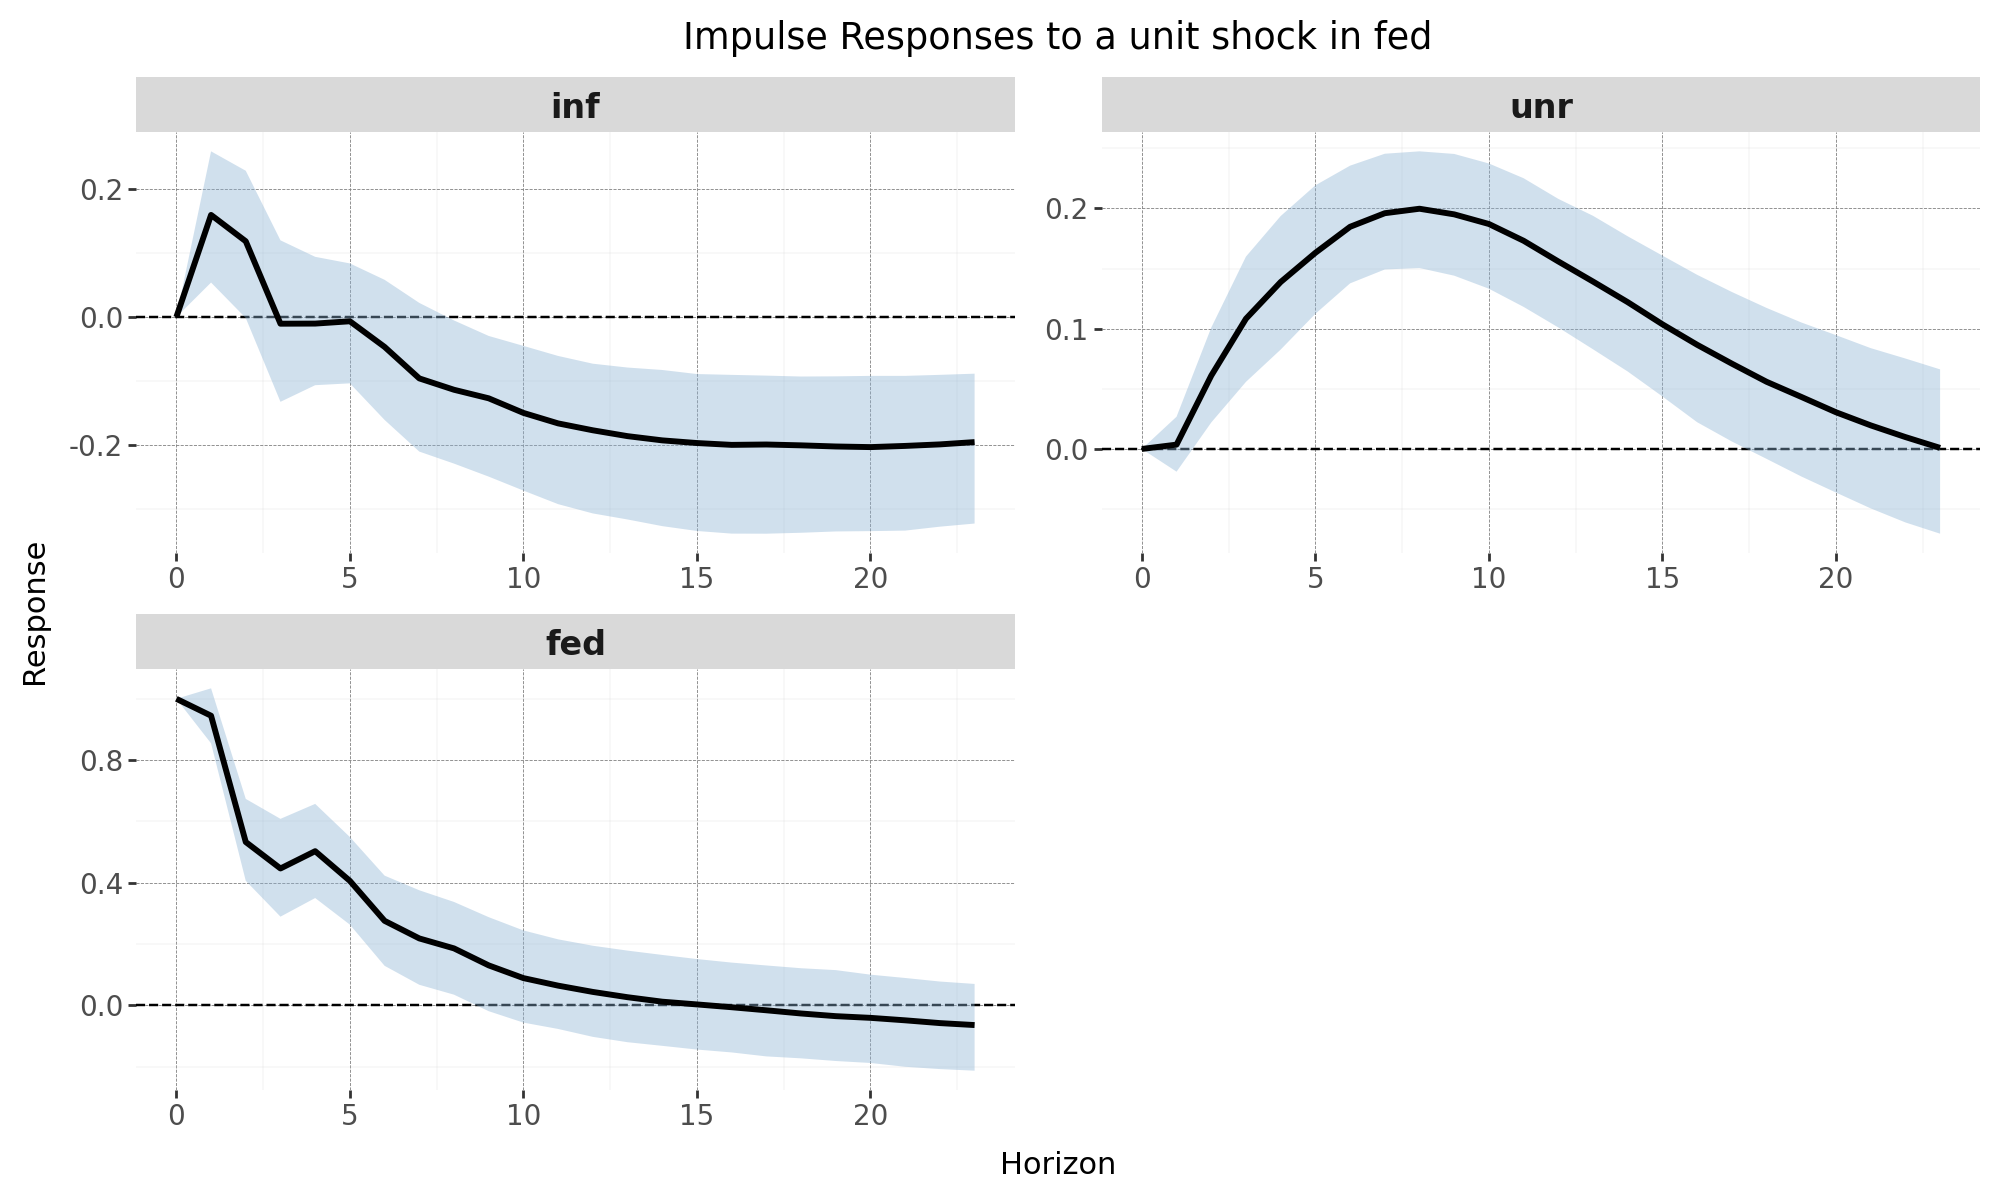

In [4]:
irfs = cvar.compute_irfs(plot_irfs=True)

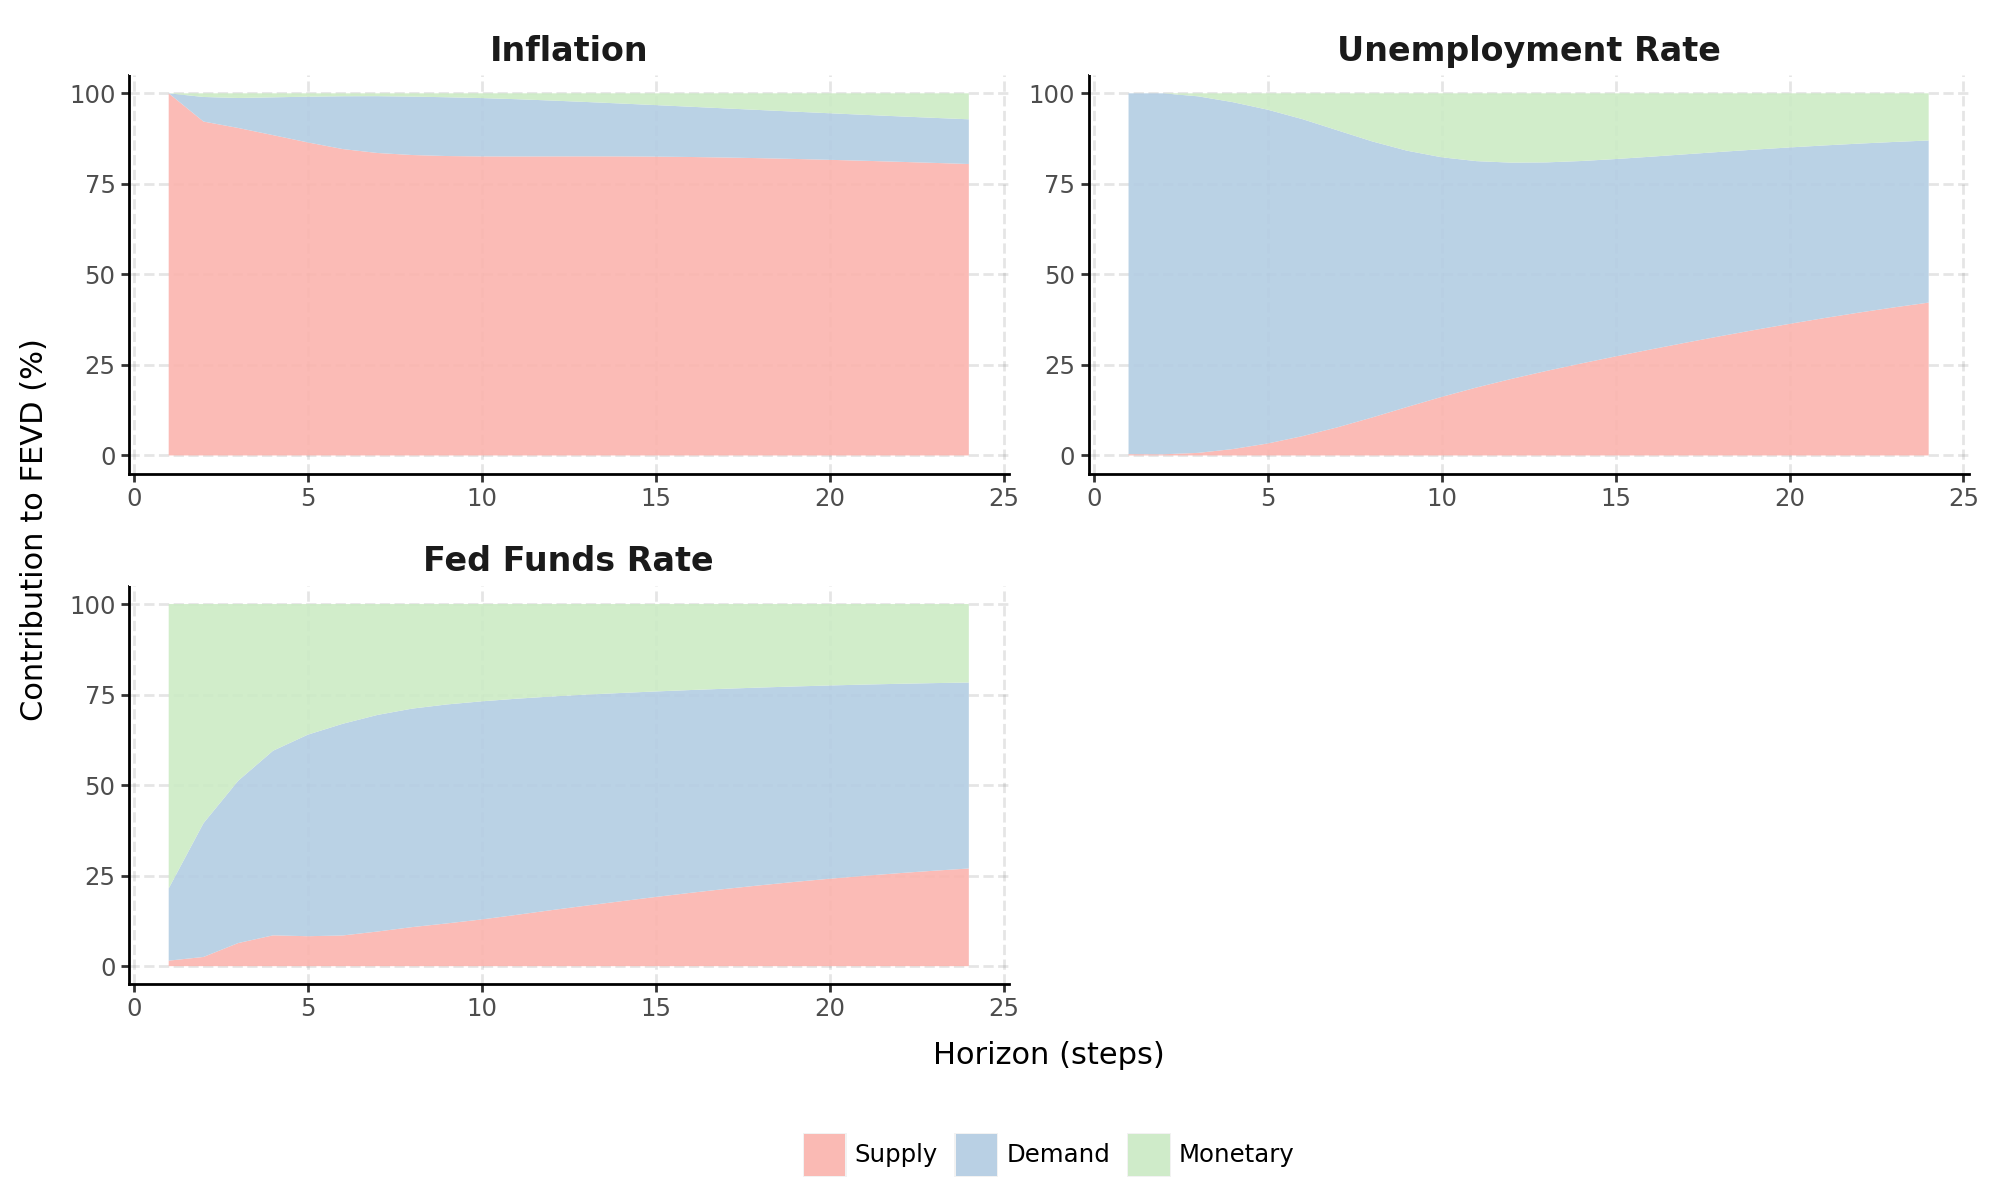

In [5]:
fevd = cvar.compute_fevd(series_titles=series_titles, plot_fevd=True, 
                         shock_titles=["Supply", "Demand", "Monetary"])